### Importei as bibliotecas necessárias

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Carreguei o dataset em um dataframe chamado "data"

In [87]:
data = pd.read_csv('raw_cement_data.csv')
data.head(10)

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Jan-10,347.0,322.0,346.0,122.4,182277.0,60314.00,10.25,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-10,306.0,285.0,338.0,122.5,181018.0,61213.92,10.33,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-10,236.0,245.0,276.0,122.6,179759.0,62113.83,10.42,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-10,234.0,212.0,245.0,122.8,178500.0,63013.75,10.50,NaN,NaN,NaN,NaN,NaN,NaN
4,May-10,296.0,289.0,312.0,122.9,177354.0,63913.67,10.58,NaN,NaN,NaN,NaN,NaN,NaN
5,Jun-10,224.0,212.0,215.0,123.1,176208.0,64813.58,10.67,NaN,NaN,NaN,NaN,NaN,NaN
6,Jul-10,184.0,174.0,181.0,123.2,175062.0,65713.50,10.75,NaN,NaN,NaN,NaN,NaN,NaN
7,Aug-10,193.0,200.0,216.0,123.3,177418.0,66613.42,10.83,NaN,NaN,NaN,NaN,NaN,NaN
8,Sep-10,169.0,152.0,178.0,123.5,179774.0,67513.33,10.92,NaN,NaN,NaN,NaN,NaN,NaN
9,Oct-10,200.0,214.0,215.0,123.6,182130.0,68413.25,11.00,NaN,NaN,NaN,NaN,NaN,NaN


### Verifiquei a forma, os tipos de dados e se há valores nulos e duplicados

In [88]:
shape = data.shape
data.info()
nulls = data.isnull().sum()
duplicates = data.duplicated().sum()
print(f'The shape of the dataset is {shape}')
print(f'There are {nulls} null values')
print(f'There are {duplicates} duplicated values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(13), object(1)
memory usage: 109.4+ KB
The shape of the dataset is (999, 14)
There are Month           844
Production      844
Sales           844
demand          844
population      844
gdp 

### Removi as colunas que não serão utilizadas e as linhas com valores nulos

In [89]:
data = data.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1)
data = data.dropna()
data.tail()

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate
150,Jul-22,434.0,430.0,547.0,141.3,259097.99,227898.85,8.35
151,Aug-22,422.0,419.0,526.0,141.4,257824.66,229964.90,8.39
152,Sep-22,433.0,431.0,502.0,141.5,256551.33,232030.94,8.43
153,Oct-22,453.0,451.0,625.0,141.6,255278.00,234096.99,8.48
154,Nov-22,903.0,895.0,900.0,141.7,254004.67,236163.04,8.60


### Renomeei as colunas para facilitar a manipulação

In [90]:
columns = ['month', 'production', 'sales', 'demand', 'population', 'gdp',
       'disbursement', 'interest_rate']
for i in range(len(columns)):
    data.rename(columns={data.columns[i]: columns[i]}, inplace=True)

### Verifiquei a correlação entre as variáveis e criei um mapa de calor

C:\Users\Admin\AppData\Local\Temp\ipykernel_4404\785870601.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


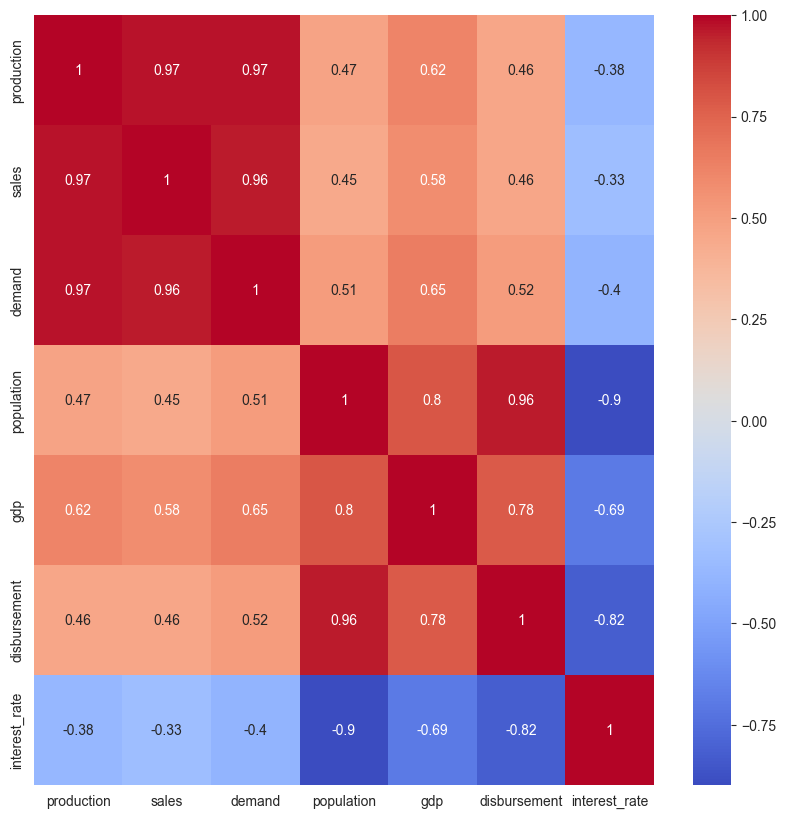

In [91]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Correlações com a variável "demand":**
1. production: 0.97
2. sales: 0.96
3. disbursement: 0.98
4. gdp: 0.65
5. disbursement: 0.52
6. interest_rate: -0.4


**Correlações com a variável "production":**

1. demand: 0.97
2. sales: 0.97
3. disbursement: 0.46
4. gdp: 0.62
5. disbursement: 0.46
6. interest_rate: -0.38

***Correlações com a variável "sales":***
1. demand: 0.96
2. production: 0.97
3. disbursement: 0.46
4. gdp: 0.58
5. disbursement: 0.46
6. interest_rate: -0.33


### Verifiquei a distribuição das variáveis com histogramas

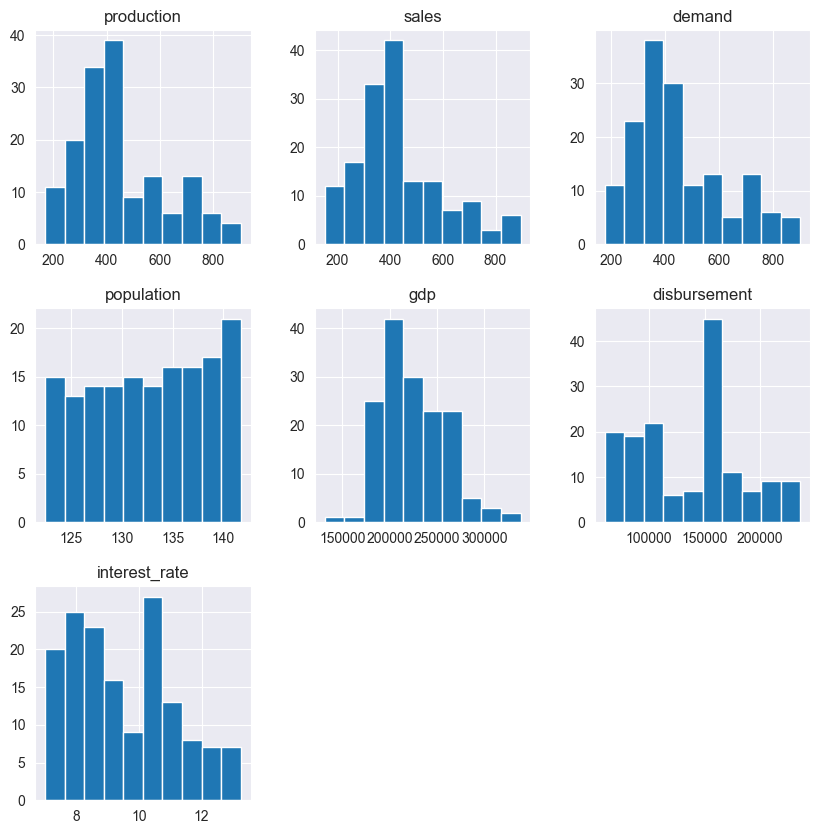

In [92]:
data.hist(figsize=(10, 10))
plt.show()

### Verifiquei a distribuição das variáveis com boxplots

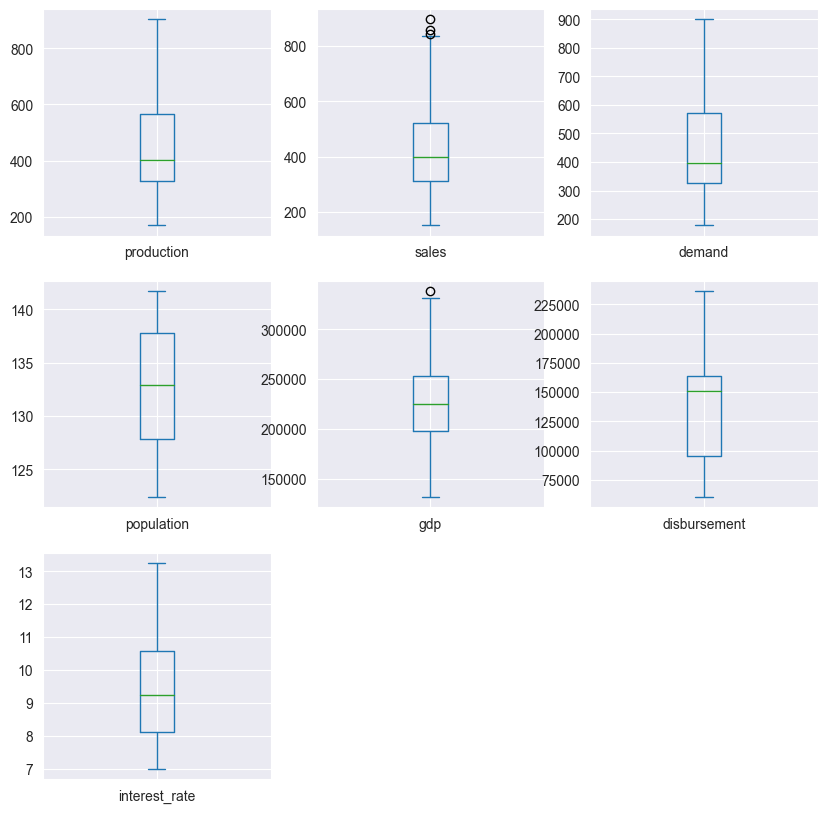

In [93]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10, 10))
plt.show()

### Verifiquei a distribuição das variáveis com uma matriz de dispersão

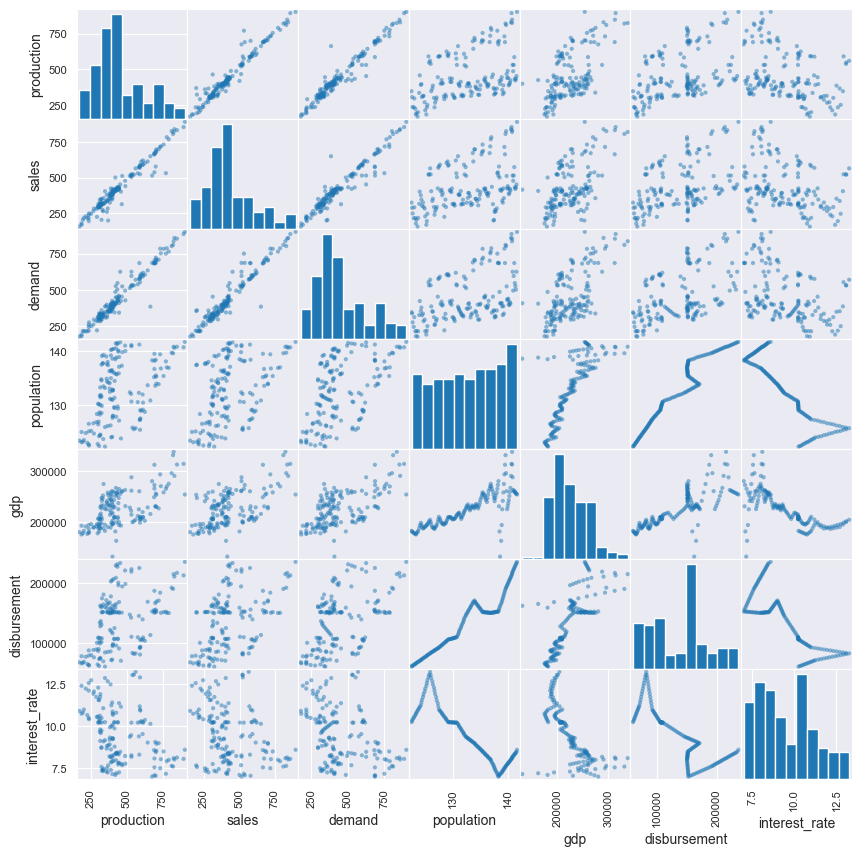

In [94]:
pd.plotting.scatter_matrix(data, figsize=(10, 10), alpha=0.5)
plt.show()

**Distribuição:**
1. production: normal
2. sales: normal
3. demand: normal
4. population: normal
5. gdp: normal
6. disbursement: normal
7. interest_rate: normal
8. month: normal


### Dividi a coluna month em 3 colunas: month & year

In [95]:
# dividindo a coluna month em 2 colunas: month & year split(-)
data['new_month'] = data['month'].str.split('-').str[0]
data['new_year'] = data['month'].str.split('-').str[1]

# dropando a coluna month
data = data.drop(['month'], axis=1)

### Somei os valores d acoluna 'year' com 2000

In [96]:
data.columns = ['production', 'sales', 'demand', 'population', 'gdp', 'disbursement',
       'interest_rate', 'month', 'year']
data['year'] = data['year'].astype(int)
data['yead'] = data['year'] + 2000
data.head()

,production,sales,demand,population,gdp,disbursement,interest_rate,month,year,yead
0,347.0,322.0,346.0,122.4,182277.0,60314.00,10.25,Jan,10,2010
1,306.0,285.0,338.0,122.5,181018.0,61213.92,10.33,Feb,10,2010
2,236.0,245.0,276.0,122.6,179759.0,62113.83,10.42,Mar,10,2010
3,234.0,212.0,245.0,122.8,178500.0,63013.75,10.50,Apr,10,2010
4,296.0,289.0,312.0,122.9,177354.0,63913.67,10.58,May,10,2010


### Criei um gráfico de linhas para verificar a tendência das variáveis "production", "sales" e "demand ao longo dos anos

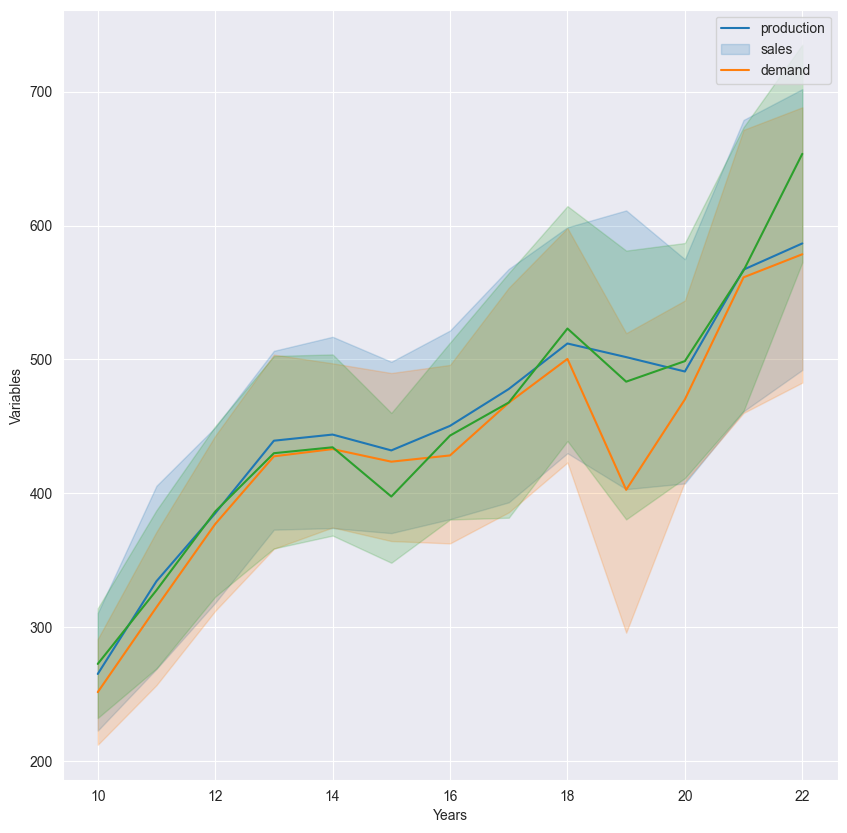

In [97]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='year', y='production', data=data)
sns.lineplot(x='year', y='sales', data=data)
sns.lineplot(x='year', y='demand', data=data)
plt.legend(['production', 'sales', 'demand'])
plt.ylabel('Variables')
plt.xlabel('Years')
plt.show()

### Exportei o dataset para um arquivo csv

In [98]:
data.to_csv('cement_data.csv', index=False)